# Considering the graph represents districts of a city

Here we could formulate the network goal as *increasing the efficiency* with which we travel within the city by means of public transportation. This allows us to formulate the goal - while making few simplifying asssumptions - as such:

All the inhabitants of a distict (node [Population]) use the same means of transportation specified by the costs of an edge.
The more people live in an district, the greater the need for fast (short duration) and various (no. adj. edges) connections.
Noticing that we have hubs or communities within our city, centralizing transport to other communities by one central district may limit the construction of many 'smaller' districts.

### Load network 

In [140]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pickle

In [141]:
G = pickle.load(open('../Data/Districts_of_Gujarat.pickle', 'rb'))

assert (len(G.nodes) == 33)
assert (len(G.edges) == 71)

# Success -> The same graph as in notebook 2

### Setting up the graph

In [142]:
weights = {(u,v) : data['Speed'] for u, v, data in G.edges(data=True)}
nx.set_edge_attributes(G, weights, name = 'weight')
G.edges(data=True)

EdgeDataView([('Ahmedabad', 'Anand', {'Speed': 9, 'weight': 9}), ('Ahmedabad', 'Bhavnagar', {'Speed': 77, 'weight': 77}), ('Ahmedabad', 'Botad', {'Speed': 70, 'weight': 70}), ('Ahmedabad', 'Gandhinagar', {'Speed': 46, 'weight': 46}), ('Ahmedabad', 'Kheda', {'Speed': 10, 'weight': 10}), ('Ahmedabad', 'Mehsana', {'Speed': 32, 'weight': 32}), ('Ahmedabad', 'Surendranagar', {'Speed': 3, 'weight': 3}), ('Anand', 'Bharuch', {'Speed': 27, 'weight': 27}), ('Anand', 'Kheda', {'Speed': 45, 'weight': 45}), ('Anand', 'Vadodara', {'Speed': 87, 'weight': 87}), ('Bhavnagar', 'Amreli', {'Speed': 76, 'weight': 76}), ('Bhavnagar', 'Botad', {'Speed': 40, 'weight': 40}), ('Botad', 'Amreli', {'Speed': 48, 'weight': 48}), ('Botad', 'Rajkot', {'Speed': 2, 'weight': 2}), ('Botad', 'Surendranagar', {'Speed': 44, 'weight': 44}), ('Gandhinagar', 'Aravalli', {'Speed': 94, 'weight': 94}), ('Gandhinagar', 'Kheda', {'Speed': 16, 'weight': 16}), ('Gandhinagar', 'Mehsana', {'Speed': 67, 'weight': 67}), ('Gandhinagar',

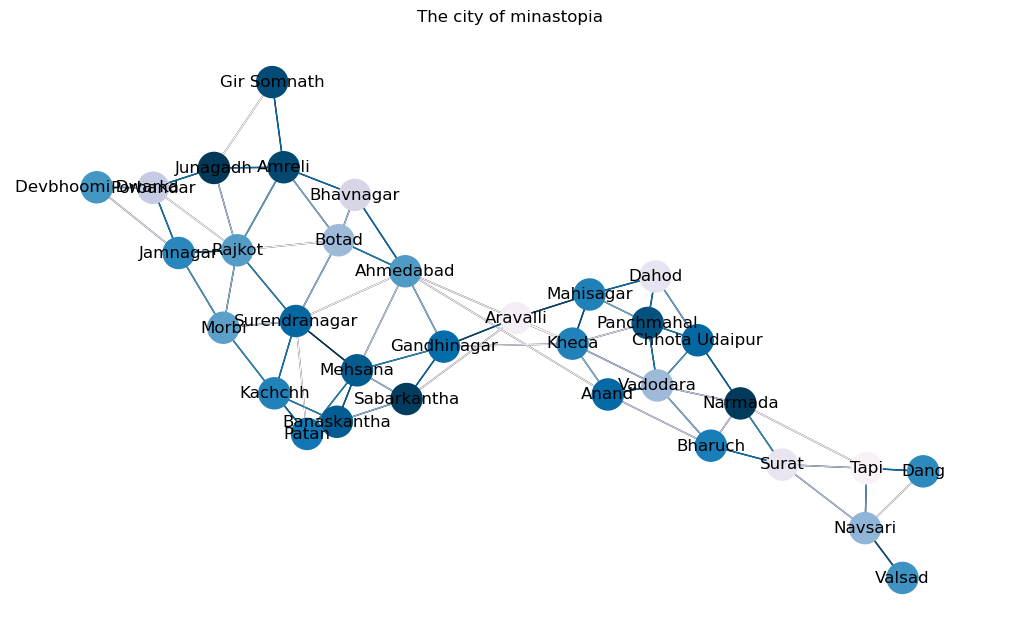

In [143]:
import warnings
warnings.filterwarnings('ignore')

# Create a colormap based on the 'Population' values
populations = [data['Population'] for _, data in G.nodes(data=True)]
cmap = plt.get_cmap('PuBu')

# Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r'
# 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r'
# 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r'
# 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn'
# 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone'
# 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix'
# 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r'

node_colors = [cmap(population / max(populations)) for population in populations]

# Get edges
speed = [data['weight'] for k,v, data in G.edges(data=True)]
edge_cmap = plt.get_cmap('PuBu')
edge_colors = [edge_cmap(s/max(speed)) for s in speed]
#  Get edge labels
edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}

# Try random this time
pos = nx.spring_layout(G)

# Plot the graph with edge weights
plt.figure(figsize=(10,6))
nx.draw(G, pos, with_labels=True, node_size=500, node_color=node_colors, font_size=12, font_color='black', cmap=node_colors)
nx.draw_networkx_edges(G, pos, edge_color=edge_colors, edgelist=edge_labels, edge_cmap=edge_cmap)
plt.title("The city of minastopia")
plt.show()

Light edges indicate a low speed and dark ones indicate high speed. The same is true for the nodes. Now we have a good visualization of node and edge relevance!

*The cmap is not plotted here. This is quite unfortunate and shall be resolved!*

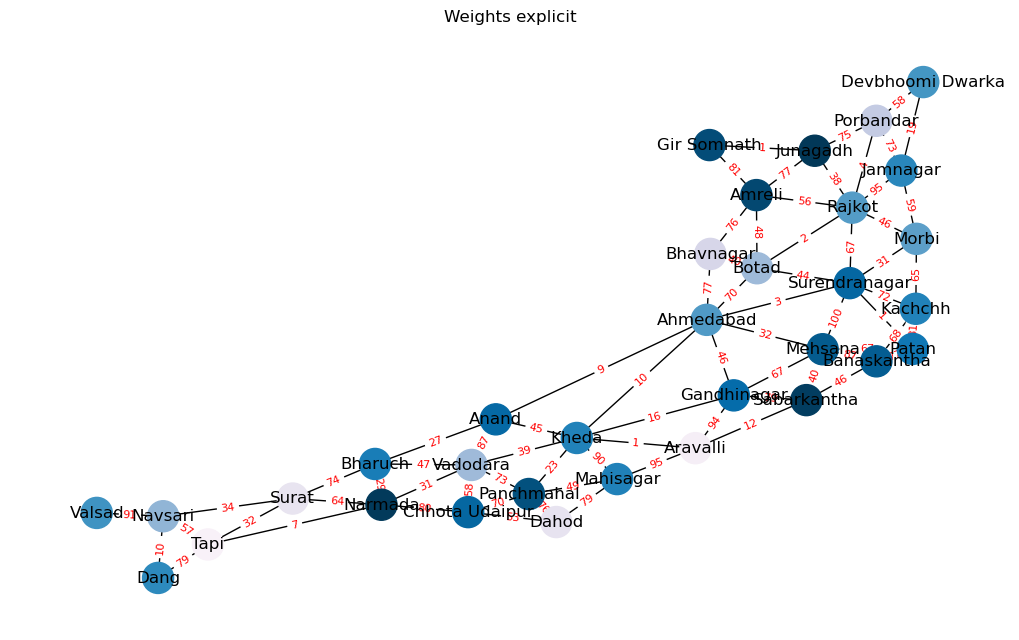

In [144]:
import matplotlib.pyplot as plt

# Let us visualize the complete graph

pos = nx.spring_layout(G)

# Get edge weights
edge_weights = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}

# Plot the graph with edge weights
plt.figure(figsize=(10, 6))
nx.draw(G, pos, with_labels=True, node_size=500, font_size=12, font_color='black', node_color=node_colors)
nx.draw_networkx_edge_labels(
    G, pos, edge_labels=edge_weights, font_size=8, font_color='red')
plt.title("Weights explicit")

plt.show()

### Connectivity

Since we want our city to be better connected, we first do an inquiry how the structre looks on the inside.

In [145]:
# First the graph shall be 2-edge connected thus that one edge removal does not cause disconnection of any 2 nodes

assert(nx.is_k_edge_connected(G, 2)==False)

edges_aug_2k = nx.k_edge_augmentation(G, 2) # consider the complement of G for completion

for edg in edges_aug_2k:
    print(edg)
    
# We dot not want to keep them but make G 3-connected and add those edges

('Dang', 'Valsad')


In [146]:
assert(nx.is_k_edge_connected(G, 3)==False)

edges_aug_3k = nx.k_edge_augmentation(G, 3) # consider the complement of G for completion
add = list(edges_aug_3k)

values = [np.random.randint(0, 101) for _ in range(len(add))]
edges_to_value = dict(zip(add, values))

G.add_edges_from(edges_to_value)

nx.is_k_edge_connected(G, 3)
# Means G is not inseparable by removal of 2 edges

True

*Note: For k>3 and large graphs this problem is hard to solve as it falls under the NP-complete problems.*

### Node centrality and flow

In [147]:
print(nx.density.__doc__)

nx.density(G) # The ration of 2*edges/n*n nodes is rather low. There are few edges in respect to the nodes

Returns the density of a graph.

    The density for undirected graphs is

    .. math::

       d = \frac{2m}{n(n-1)},

    and for directed graphs is

    .. math::

       d = \frac{m}{n(n-1)},

    where `n` is the number of nodes and `m`  is the number of edges in `G`.

    Notes
    -----
    The density is 0 for a graph without edges and 1 for a complete graph.
    The density of multigraphs can be higher than 1.

    Self loops are counted in the total number of edges so graphs with self
    loops can have density higher than 1.
    


0.14015151515151514

In [148]:
print(nx.degree_centrality.__doc__)

# Look for centrality of nodes
nx.degree_centrality(G)

Compute the degree centrality for nodes.

    The degree centrality for a node v is the fraction of nodes it
    is connected to.

    Parameters
    ----------
    G : graph
      A networkx graph

    Returns
    -------
    nodes : dictionary
       Dictionary of nodes with degree centrality as the value.

    Examples
    --------
    >>> G = nx.Graph([(0, 1), (0, 2), (0, 3), (1, 2), (1, 3)])
    >>> nx.degree_centrality(G)
    {0: 1.0, 1: 1.0, 2: 0.6666666666666666, 3: 0.6666666666666666}

    See Also
    --------
    betweenness_centrality, load_centrality, eigenvector_centrality

    Notes
    -----
    The degree centrality values are normalized by dividing by the maximum
    possible degree in a simple graph n-1 where n is the number of nodes in G.

    For multigraphs or graphs with self loops the maximum degree might
    be higher than n-1 and values of degree centrality greater than 1
    are possible.
    


{'Ahmedabad': 0.21875,
 'Anand': 0.125,
 'Bhavnagar': 0.09375,
 'Botad': 0.15625,
 'Gandhinagar': 0.15625,
 'Kheda': 0.21875,
 'Mehsana': 0.1875,
 'Surendranagar': 0.21875,
 'Amreli': 0.15625,
 'Gir Somnath': 0.09375,
 'Junagadh': 0.125,
 'Rajkot': 0.21875,
 'Bharuch': 0.125,
 'Vadodara': 0.1875,
 'Aravalli': 0.125,
 'Mahisagar': 0.125,
 'Sabarkantha': 0.125,
 'Banaskantha': 0.125,
 'Kachchh': 0.125,
 'Patan': 0.125,
 'Narmada': 0.15625,
 'Surat': 0.125,
 'Chhota Udaipur': 0.125,
 'Dahod': 0.09375,
 'Panchmahal': 0.15625,
 'Dang': 0.09375,
 'Navsari': 0.125,
 'Tapi': 0.125,
 'Devbhoomi Dwarka': 0.09375,
 'Jamnagar': 0.125,
 'Porbandar': 0.125,
 'Morbi': 0.125,
 'Valsad': 0.125}

In [149]:
# Lets save those values with highest connectivity in out center_nodes
center_nodes = nx.degree_centrality(G)

center_nodes = [node for node, value in center_nodes.items() if value >= nx.density(G)]

print(nx.betweenness_centrality.__doc__)
nx.betweenness_centrality(G)

Compute the shortest-path betweenness centrality for nodes.

    Betweenness centrality of a node $v$ is the sum of the
    fraction of all-pairs shortest paths that pass through $v$

    .. math::

       c_B(v) =\sum_{s,t \in V} \frac{\sigma(s, t|v)}{\sigma(s, t)}

    where $V$ is the set of nodes, $\sigma(s, t)$ is the number of
    shortest $(s, t)$-paths,  and $\sigma(s, t|v)$ is the number of
    those paths  passing through some  node $v$ other than $s, t$.
    If $s = t$, $\sigma(s, t) = 1$, and if $v \in {s, t}$,
    $\sigma(s, t|v) = 0$ [2]_.

    Parameters
    ----------
    G : graph
      A NetworkX graph.

    k : int, optional (default=None)
      If k is not None use k node samples to estimate betweenness.
      The value of k <= n where n is the number of nodes in the graph.
      Higher values give better approximation.

    normalized : bool, optional
      If True the betweenness values are normalized by `2/((n-1)(n-2))`
      for graphs, and `1/((n-1)(n-2))` for 

{'Ahmedabad': 0.3112676792557011,
 'Anand': 0.10845367472502197,
 'Bhavnagar': 0.03149422624339607,
 'Botad': 0.08552868634106775,
 'Gandhinagar': 0.04386351314719435,
 'Kheda': 0.2063501561426134,
 'Mehsana': 0.07537457436354497,
 'Surendranagar': 0.1833475035532673,
 'Amreli': 0.07828951567091984,
 'Gir Somnath': 0.05750216570010212,
 'Junagadh': 0.015714186127492577,
 'Rajkot': 0.13488903437907232,
 'Bharuch': 0.0654225699321762,
 'Vadodara': 0.10936290510827984,
 'Aravalli': 0.028322903574919695,
 'Mahisagar': 0.027723519759810078,
 'Sabarkantha': 0.024048546593613006,
 'Banaskantha': 0.012503533916010195,
 'Kachchh': 0.022994789971782382,
 'Patan': 0.0045759236283429835,
 'Narmada': 0.09837313652244865,
 'Surat': 0.055636587479566596,
 'Chhota Udaipur': 0.02874886024791148,
 'Dahod': 0.004553874335658016,
 'Panchmahal': 0.03874132436454542,
 'Dang': 0.021670139830125598,
 'Navsari': 0.06541665725429956,
 'Tapi': 0.056126988918734654,
 'Devbhoomi Dwarka': 0.0605889686030815,
 'Jamn

What this mesure actually tells us is how relevant a node is in establishing shortest paths among 2 nodes! A high betweenness centrality indicates that a node is crucial for maintaining efficient communication in the network (shortest paths). Nodes with high betweenness centrality act as bridges or intermediaries between different parts of the network. If that node were to be removed, it could significantly impact the flow of information between other nodes!

In [150]:
# That is why we have the ones with the highest value in another list!
flow_nodes = [node for node, value in nx.betweenness_centrality(G).items() if value >= 0.2]
flow_nodes

['Ahmedabad', 'Kheda']

### Communities


In [151]:
# Identify and plot the communities of G
g_greedy_com = nx.community.greedy_modularity_communities(G, weight='weight')
g_nirw_com = nx.community.girvan_newman(G)

In [152]:
import random

def draw_community(communities):
    
    # Operate on duplicate
    Copy = G.copy()
    
    # Numb of comm.
    num_com = len(communities)
    
    # Get the colors
    random_colors = ['#%06x' % random.randint(0, 0xFFFFFF) for _ in range(num_com)]

    for i in range(num_com):
        nx.set_node_attributes(Copy.subgraph(
            list(communities[i])), random_colors[i], 'Color')

    #print(Copy.nodes(data=True))

    color_list = [data['Color'] for node, data in Copy.nodes(data=True)]

    nx.draw(Copy, node_color=color_list, with_labels=True)
    plt.show()
    
    del Copy

In [153]:
def count_population_and_speed(G, community):
    
    popl = []
        
    for index, i in enumerate(community):
        popl.append({sum([d['Population'] for n, d in nx.subgraph(G, community[index]).nodes(data=True)])})
        
    for index, i in enumerate(community):
        print(f'Global efficiency of subgraph G0{index+1}: {nx.global_efficiency(nx.subgraph(G,list(i)))}; Local population: {popl[index]}')
    
    pass

Global efficiency of subgraph G01: 0.5113157894736845; Local population: {12622655}
Global efficiency of subgraph G02: 0.5873931623931623; Local population: {7104427}


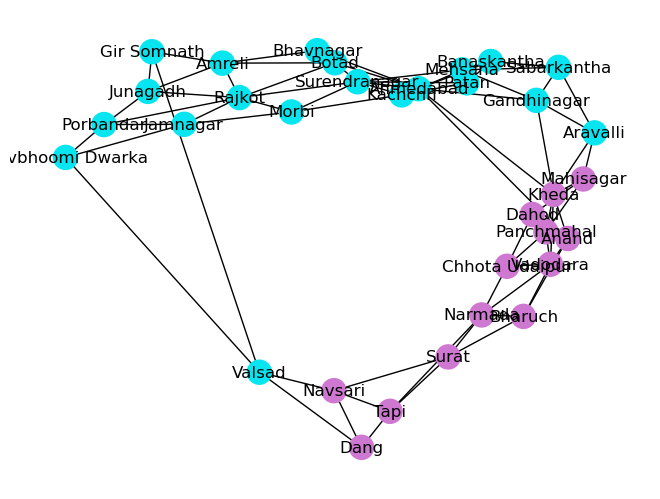

In [154]:
community = next(g_nirw_com)

value = count_population_and_speed(G, community)
draw_community(community)

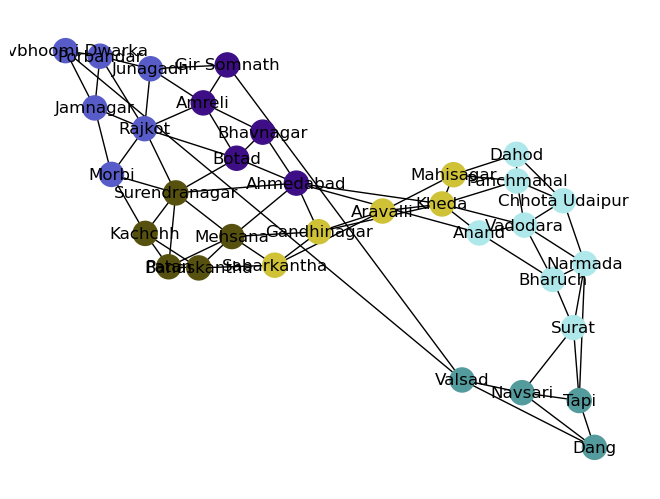

Global efficiency of subgraph G01: 0.7083333333333331; Local population: {4708687}
Global efficiency of subgraph G02: 0.8; Local population: {3531898}
Global efficiency of subgraph G03: 0.9; Local population: {3792760}
Global efficiency of subgraph G04: 0.7833333333333334; Local population: {2952338}
Global efficiency of subgraph G05: 0.85; Local population: {3073577}
Global efficiency of subgraph G06: 0.9166666666666666; Local population: {1667822}


In [155]:
draw_community(g_greedy_com)

count_population_and_speed(G, g_greedy_com)

### Problemdescription


Goal: increase global efficiency with minimal $\underline{costs}$

Costs: No. of new edges ~ number of iterations to reach *condition* $\frac{1}{N} \sum{local\_efficiency}$ $\geq$ $global\_efficiency$. 

We can formulate the following optimization procedure: 

With constants: 

- $P_c$ = Population of a district
- $C$ = Set of communities
- $G(N,E) = $ Graph with nodes N and edges E where N has attr 'Population' and 'District'
- $G/E$ = Complement of the edges of G
- $\lambda$ = Penality term, [0,1)

----

$def\ function\ add\_edge(G, C, \lambda)$:

> $if \frac{1}{N} \sum{local\_efficiency}$ $\geq$ $global\_efficiency$:
> > $return\ G$
> 
> $else$:
> > $for\ e \in G/E$
> > > $global\_efficiency\_gain = EFF(G + e) - EFF(G)$\
> > > $local\_efficiency\_gain = EFF(C + e) \cdot \log_{10}(P_c) - EFF(C)$\
> > > $C' = Community(G+e)$\
> > > $gain = global\_efficiency\_gain + \frac{1}{2} \cdot local\_efficiency\_gain + (\lambda \cdot \frac{1}{|C'|})$
> >
> > > $if gain > best:$\
> > > > $best = gain$\
> > > > $Communities = C'$\
> > > > $Graph = G + e$
> >
> > $Call\ add\_edge(Graph, Communities)$

-----

**Caveats**

1) I rely on the networkx.efficiency function to evaluate the network. The documentation is not clecar as to whether the edge cost, or weight, is used as reference for the shortest paths or weather each edge has uniform costs of 1. Because I want to build a working demo, the research on this question is postponed for now.

2) The runtime and the memory costs are not ideal. The next step involves creating a binary heap where the edges form the nodes to make the results reusable. Although a new grap G' having an additional edge of the old graph G is used for recursive call and the chance of next highest node in the heap being the successor in terms of *gain*, this consideration remains strong to limit the algorithmic costs.

3) Explaination of comment **#3** in the code: If the new edge e(u,v) has its nodes u and v in 2 disjunct communities that means that calling the efficiency measure on the subgraphs induced by the communities U and V will not changed compared to U/e and V/e as no additional edge is there. Therefore we perform a call of the combined set.

In [156]:
# Identify and plot the communities of G
g_greedy_com = nx.community.greedy_modularity_communities(G)
g_nirw_com = nx.community.girvan_newman(G)

### Implementation

In [157]:
def assign_districts(graph, communities):
    """Assigns each node a number depending on the community it is in.
    
    Argument: Graph
    
    Returns: None 
    """
    district_mapping = {}

    # Assign districts to each community
    for district_id, community in enumerate(communities, start=1):
        for node in community:
            district_mapping[node] = district_id
            
            try:
                del graph.nodes[node]['District']
            except KeyError:
                pass

    # Set 'District' attribute for each node in the graph
    nx.set_node_attributes(graph, name='District', values=district_mapping)
    

assign_districts(G, g_greedy_com)

In [158]:
def has_different_districts(graph):
    """Tests whether graph has conflicting values for the node property District. 
    
    Arguments: Graph
    
    Return: Boolean
    """

    # Get the subsets using greedy_modularity_communities
    subsets = nx.community.greedy_modularity_communities(graph)

    # Check if any two nodes within a subset have different 'District' attributes
    for subset in subsets:
        district_set = set(graph.nodes[node]['District'] for node in subset)
        if len(district_set) > 1:
            return True  # Different districts found within a subset

    return False  # No subsets with different districts found

has_different_districts(G)

False

In [159]:
import os 
import pdb


def add_edge_to_G(Graph, Community, Penalty, Iterations):
    
    """Recursive function to add edges one-by-one until the condition of average local efficiency higher than global efficiency is met.
    
    Arguments:
    
    Graph = Graph to add edges to (nx.Graph),
    Community = Set of Communities of G (nx.Community.any_funtion(G)). Can be list of frozensets of lists.
    Penalty = Term for the impact of number of communities (See gain).
    Iterations = Number of iterations performed. Stop if I > max_iteration. Calculated by max_iteration - I.
    max_iteration = Number of max. recusrive steps. Not argument of the function call, but maybe I change that.
    
    Return:
    
    G' which is the extension of G meeting the recusrsive condition.
    
    """
    
    # Limit runtime and edge addition
    max_iteration = 100
    
    # To not overflow the memory we limit number of function calls.
    if Iterations >= max_iteration:
        print('Exceeded max_iteration.\nReturn graph.')
        return Graph
    
    # Anything but lists is not desired
    if type(Community) == list:
        pass
    else: 
        Community = list(Community)
        
    
    # Recursive condition
    sum_local = np.sum([nx.global_efficiency(Graph.subgraph(list(i)))
                       for index, i in enumerate(Community)])
    if nx.global_efficiency(Graph) >= 1/len(Community) * sum_local:
        return Graph
    
    # Make complement of G
    G_complement = nx.complement(Graph)
    
    # Set weights to new edges
    edges_list = G_complement.edges()
    edges_list = list(edges_list)

    random_values = [np.random.randint(1, 101) for _ in edges_list]
    edges_to_random_value = dict(zip(edges_list, random_values))

    nx.set_edge_attributes(G_complement, edges_to_random_value, 'weight')
    
    # Best score for edge addition
    best = 0
    
    for edge in G_complement.edges:
        
        # Operate on a new graph and keep G untouched
        G_copy = Graph.copy()
        G_copy.add_edge(edge[0], edge[1])
        
        global_efficiency_gain = nx.global_efficiency(
            G_copy) - nx.global_efficiency(Graph)
        
        # Find the right C(s)
        for index, c in enumerate(Community):
            if edge[0] in c:
                i = index
                
            if edge[1] in c:
                j = index
        
        if i == j:
            # Calc number of affected people 
            P_i = sum([d['Population'] for n, d in nx.subgraph(
                G_copy, Community[i]).nodes(data=True)])
            # G and G' contain and do not contain e
            local_efficiency_gain = (nx.global_efficiency(nx.subgraph(
                G_copy, Community[i])) - nx.global_efficiency(nx.subgraph(Graph, Community[i]))) * np.log10(P_i)
        
        else:
            # i 
            P_i = sum([d['Population'] for n, d in nx.subgraph(G_copy, Community[i]).nodes(
                data=True)])/sum([d['Population'] for n, d in Graph.nodes(data=True)])
            # j 
            P_j = sum([d['Population'] for n, d in nx.subgraph(G_copy, Community[j]).nodes(
                data=True)])/sum([d['Population'] for n, d in Graph.nodes(data=True)])
            
            # Combine indices and proceed as before, deflate list (len : 2)
            indices = [Community[index] for index in [i, j]]
            indices = [i for I in indices for i in I]
            
            #pdb.set_trace()
            
            # Evaluate populations together and consider pair of communities as 1 community. Allowed because of #3
            local_efficiency_gain = np.log10(P_i + P_j) * (nx.global_efficiency(
                nx.subgraph(G_copy, indices)) - nx.global_efficiency(nx.subgraph(Graph, indices)))
    
            
        # Apply new community division
        C_prime = nx.community.greedy_modularity_communities(G_copy, weight='weight')
        
        # Not needed anymore
        del G_copy
            
        # Function to optimise    
        gain = global_efficiency_gain + \
            (0.5 * local_efficiency_gain) + (Penalty * 1/len(C_prime))
        
        # Determine ideal edge by gain value
        if gain > best:
            
            # New top value 
            best = gain
            # For addition on recursive call
            EDGE = edge
            # For recursive call
            C_PRIME = C_prime
            
            
    # When best edge found call add_edge, call on copy of Graph to avoid altering input
    GraphCopy = Graph.copy()
    GraphCopy.add_edge(
        EDGE[0], EDGE[1], weight=G_complement.edges[EDGE[0], EDGE[1]]['weight'])
    
    # Cleaning up before next call
    del G_complement
    
    return add_edge_to_G(GraphCopy, C_PRIME, Penalty, Iterations+1)
            
    

In [160]:
%time

# Function call 
new_G = add_edge_to_G(G, g_greedy_com, 0.72, Iterations=50)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 6.2 µs
Exceeded max_iteration.
Return graph.


In [161]:
# Nice!
print(has_different_districts(G))

# Good!
nx.is_isomorphic(new_G, G)

False


False

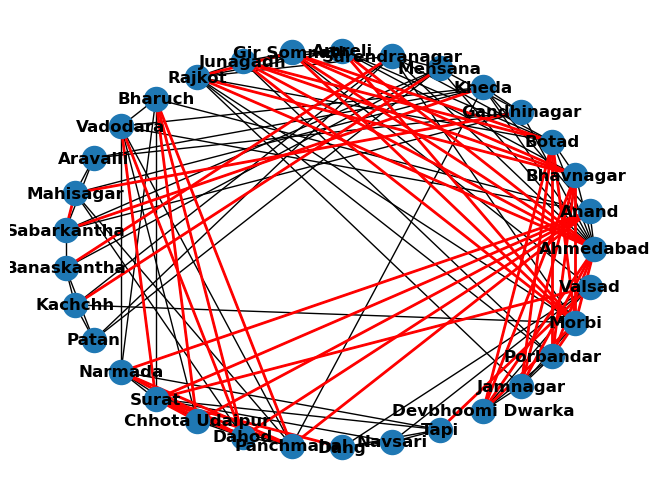

In [53]:
import matplotlib.pyplot as plt


def draw_graph_with_annotated_edges_and_nodes_by_calling_a_very_long_function(graph1, graph2):
    """Write docstring.
    """

    # Identify the extra edges in the second graph
    extra_edges = set(graph2.edges) - set(graph1.edges)

    # Plot the second graph
    pos = nx.circular_layout(graph2)
    nx.draw(graph2, pos, with_labels=True, font_weight='bold')

    # Highlight the extra edges in a different color
    nx.draw_networkx_edges(
        graph2, pos, edgelist=extra_edges, edge_color='r', width=2)

    # Display the plot
    plt.show()


draw_graph_with_annotated_edges_and_nodes_by_calling_a_very_long_function(
    G, new_G)
    

In [162]:
# Minus man
has_different_districts(new_G)

True

In [163]:
import pandas as pd
pd.value_counts([data['District'] for node, data in new_G.nodes(data=True)])


1    10
2    10
3     8
4     5
Name: count, dtype: int64

### #TODO

- District automatization
- Erase assigning effects (references)
- Plot new district map